## Straight line detection using RANSAC

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def augment(xys):
    axy = np.ones((len(xys), 3))
    axy[:, :2] = xys
    return axy

def estimate(xys):
    axy = augment(xys[:2])
    return np.linalg.svd(axy)[-1][-1, :]

def is_inlier(coeffs, xy, threshold):
    return np.abs(coeffs.dot(augment([xy]).T)) < threshold

def run_ransac(data, estimate, is_inlier, sample_size, goal_inliers, max_iterations, stop_at_goal=True, random_seed=None):
    best_ic = 0
    best_model = None
    random.seed(random_seed)
    # random.sample cannot deal with "data" being a numpy array
    data = list(data)
    
    for i in range(max_iterations):
        s = random.sample(data, int(sample_size))
        m = estimate(s)
        ic = 0
        for j in range(len(data)):
            if is_inlier(m, data[j]):
                ic += 1

        #print(s)
        print('estimate:', m,)
        print('# inliers:', ic)
        
        testdata = np.array(data)
        plt.figure()
        plt.scatter(testdata.T[0], testdata.T[1])
        a, b, c = m
        plt.plot([0, 10], [-c/b, -(c+10*a)/b], color=(0, 1, 0))
        plt.show()
        
        if ic > best_ic:
            best_ic = ic
            best_model = m
            if ic > goal_inliers and stop_at_goal:
                break
                
    print('took iterations:', i+1)
    print('best model(aX+bY+C=0):', best_model)
    print('# inliers:', best_ic)
    
    return best_model, best_ic

estimate: [ 0.19593988 -0.74968315  0.63212557]
# inliers: 2


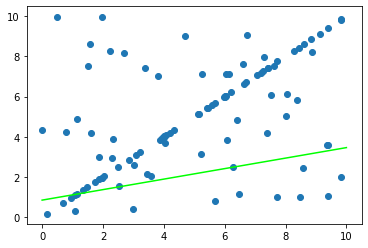

estimate: [ 0.57665107 -0.77363497  0.26260707]
# inliers: 2


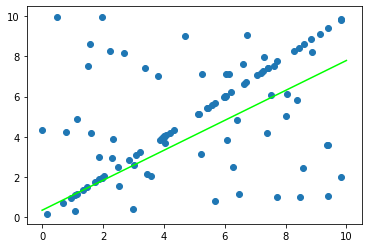

estimate: [ 0.09753169 -0.22295289  0.96993793]
# inliers: 4


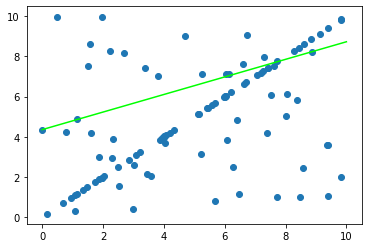

estimate: [-0.71041277  0.70365132  0.01373058]
# inliers: 16


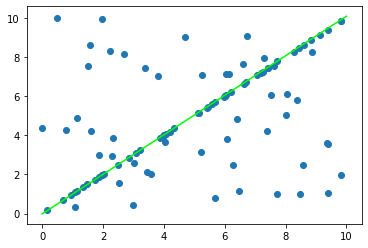

estimate: [-0.14069395  0.01222567  0.98997765]
# inliers: 4


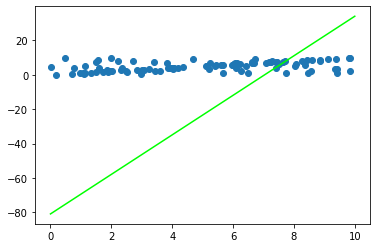

estimate: [-0.00186182 -0.09957696  0.99502812]
# inliers: 4


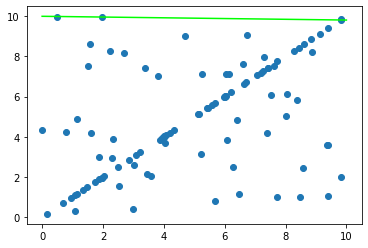

estimate: [-7.07106781e-01  7.07106781e-01 -1.40167660e-16]
# inliers: 50


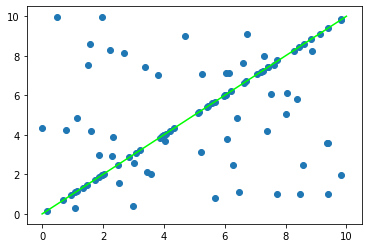

estimate: [-0.06133591 -0.18445287  0.98092561]
# inliers: 4


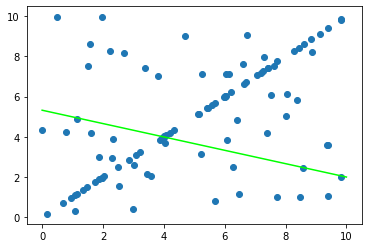

estimate: [-7.07106781e-01  7.07106781e-01  1.97795953e-16]
# inliers: 50


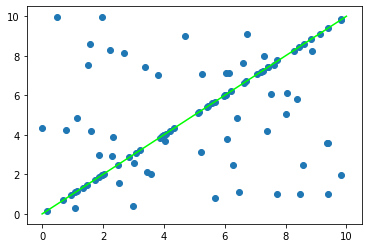

estimate: [-7.07106781e-01  7.07106781e-01 -2.36095244e-15]
# inliers: 50


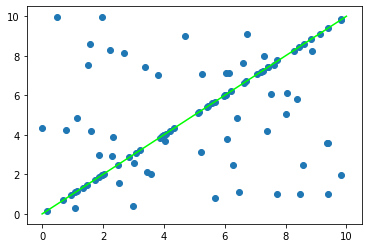

estimate: [ 0.15583972 -0.22136823  0.96265783]
# inliers: 3


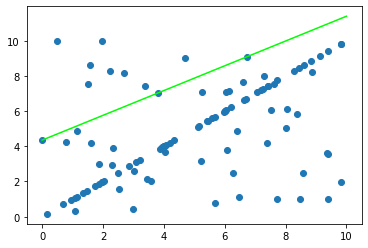

estimate: [-7.07106781e-01  7.07106781e-01 -5.56073647e-14]
# inliers: 50


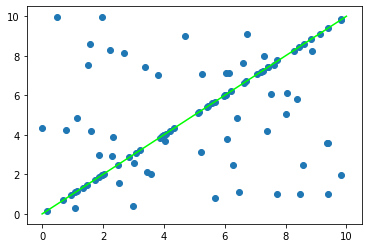

estimate: [-0.14393542 -0.04908648  0.98836891]
# inliers: 3


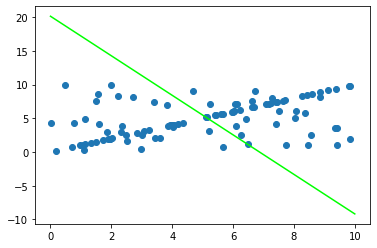

estimate: [ 0.26158148 -0.95786408  0.11862347]
# inliers: 2


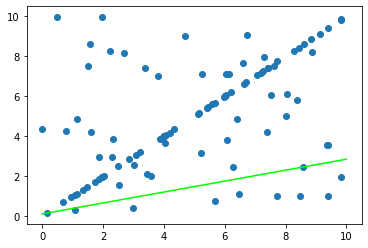

estimate: [-0.11285969 -0.03704743  0.99292003]
# inliers: 3


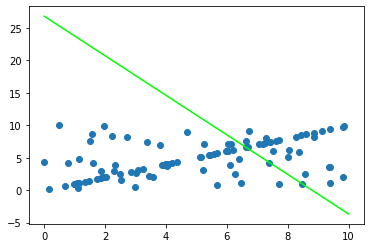

estimate: [ 0.4210802  -0.70319498  0.57289465]
# inliers: 2


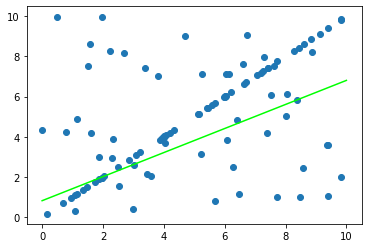

estimate: [-7.07106781e-01  7.07106781e-01 -3.26868158e-17]
# inliers: 50


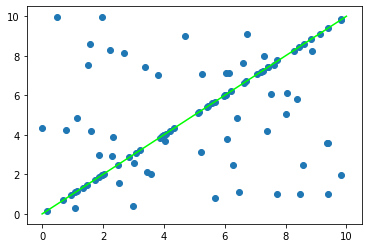

estimate: [-0.00260642 -0.43867506  0.89864198]
# inliers: 3


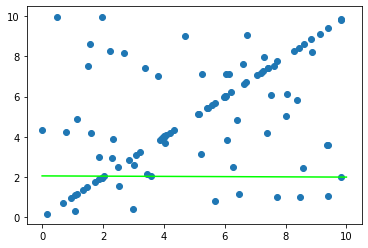

estimate: [ 0.24297836 -0.46010895  0.85396796]
# inliers: 2


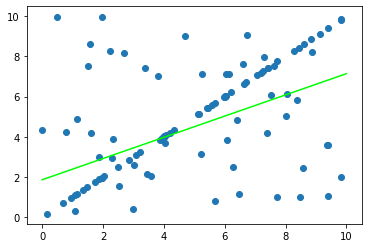

estimate: [ 0.49503884 -0.83567461  0.23787496]
# inliers: 2


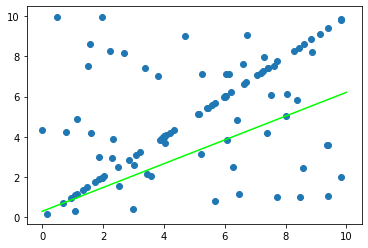

took iterations: 20
best model(aX+bY+C=0): [-7.07106781e-01  7.07106781e-01 -1.40167660e-16]
# inliers: 50


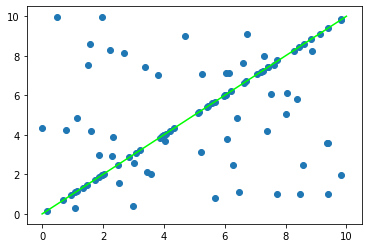

In [2]:
n = 100
max_iterations = 100
goal_inliers = n * 0.3
threshold = 0.01
random_seed = 20

# test data
xys = np.random.random((n, 2)) * 10
xys[:50, 1:] = xys[:50, :1]

# RANSAC
m, b = run_ransac(xys, estimate, lambda x, y: is_inlier(x, y, threshold), goal_inliers, max_iterations, random_seed)
a, b, c = m

plt.figure()
plt.scatter(xys.T[0], xys.T[1])
plt.plot([0, 10], [-c/b, -(c+10*a)/b], color=(0, 1, 0))
plt.show()